In [1]:
import glob
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

dir_path = os.path.join("data_manual_annotations", "annotations_gt_or", "annotations")
csv_files = glob.glob(os.path.join(dir_path, "*.csv"))


df = pd.DataFrame()


for csv_file in csv_files:
    file_path = os.path.join(csv_file)
    d = pd.read_csv(file_path)
    # append to df using concat
    df = pd.concat([df, d], ignore_index=True)


# remove colums category, consensus
df = df.drop(columns=["category", "consensus", "Unnamed: 0"])

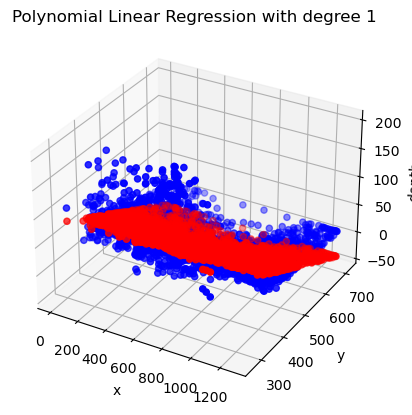

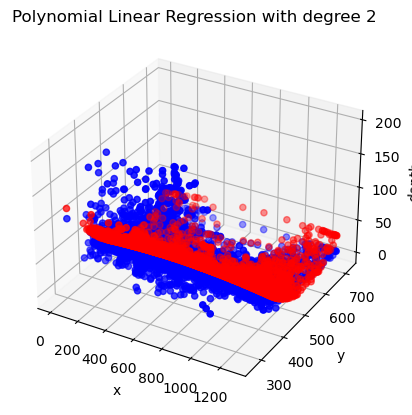

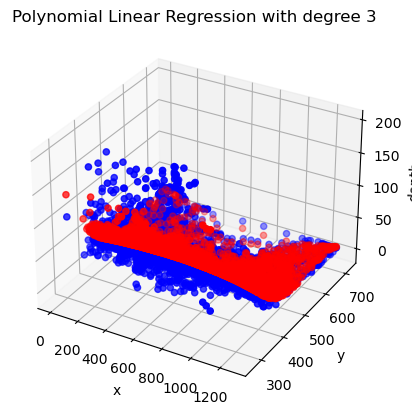

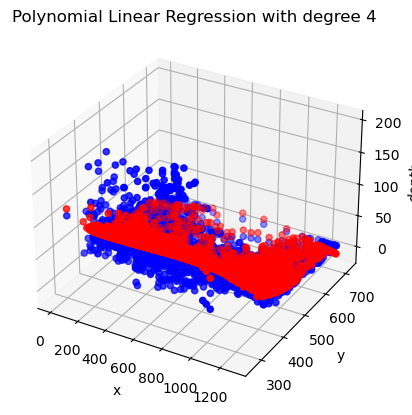

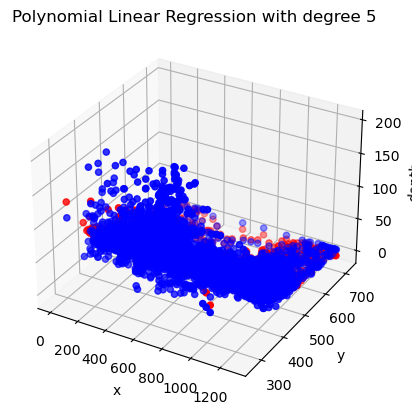

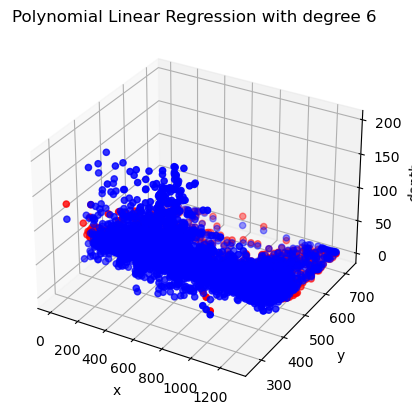

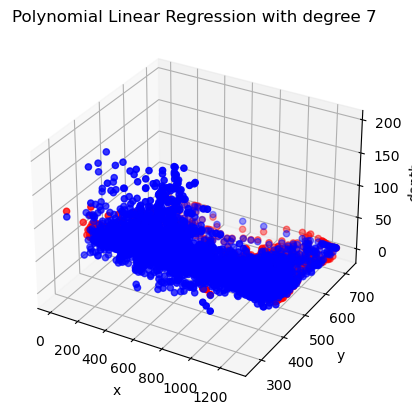

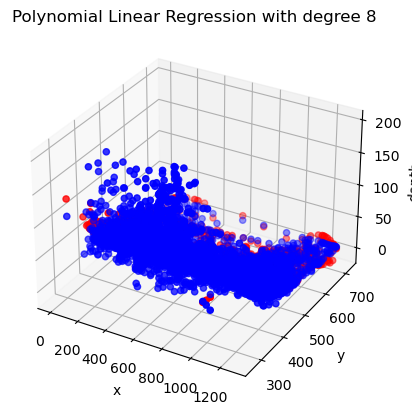

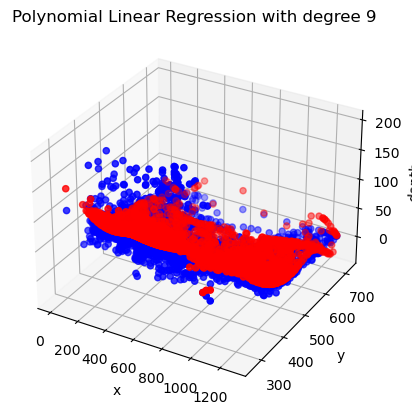

In [2]:

# making a linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# create linear regression object
# make the linear regression with polynomial kernel

for degree in range(1, 10):
    poly = PolynomialFeatures(degree=degree)
    XY_poly = poly.fit_transform(df[["x", "y"]])

    # Fit the polynomial regression model
    model = LinearRegression()
    model.fit(XY_poly, df["depth"])

    # Make predictions
    d_pred = model.predict(XY_poly)

    # Visualize the results
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(df["x"], df["y"], df["depth"], color="blue", label="Actual Data")
    ax.scatter(df["x"], df["y"], d_pred, color="red", label="Polynomial Regression")
    ax.set_title(f"Polynomial Linear Regression with degree {degree}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("depth")
    plt.show()

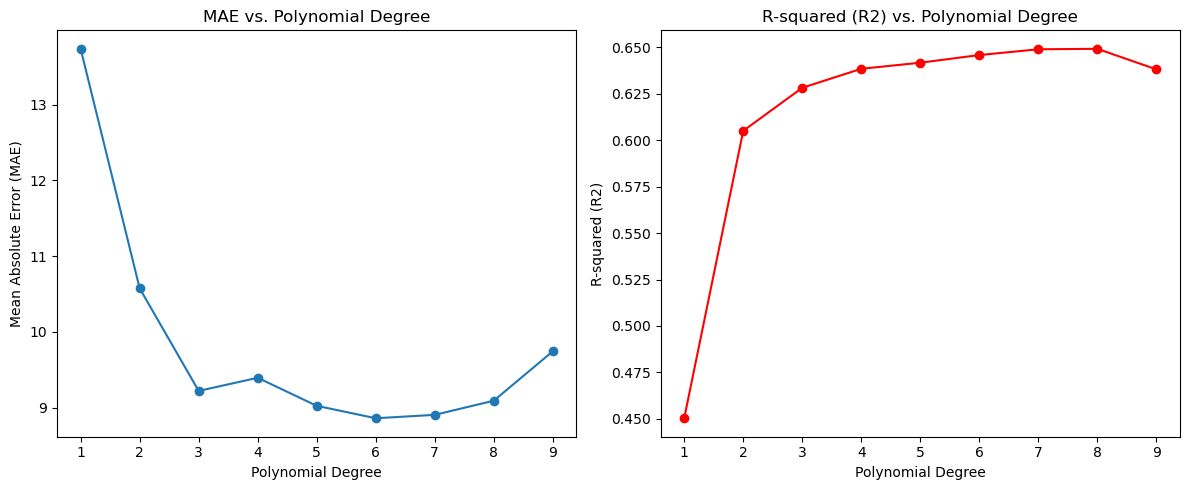

In [3]:
# Define a range of polynomial degrees
degrees = range(1, 10)  # Change the range as needed

# Initialize lists to store evaluation results
mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    XY_poly = poly.fit_transform(df[["x", "y"]])

    # Fit the polynomial regression model
    model = LinearRegression()
    model.fit(XY_poly, df["depth"])

    # Make predictions
    d_pred = model.predict(XY_poly)

    # Calculate evaluation metrics
    mae = mean_absolute_error(df["depth"], d_pred)
    mse = mean_squared_error(df["depth"], d_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(df["depth"], d_pred)

    # Append scores to lists
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Visualize the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(degrees, mae_scores, marker="o")
plt.title("MAE vs. Polynomial Degree")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Absolute Error (MAE)")

plt.subplot(1, 2, 2)
plt.plot(degrees, r2_scores, marker="o", color="red")
plt.title("R-squared (R2) vs. Polynomial Degree")
plt.xlabel("Polynomial Degree")
plt.ylabel("R-squared (R2)")

plt.tight_layout()
plt.show()


coef for degree = 3: [-6.13183029e+00  1.03173169e-02 -5.76531414e-06]
intercept for degree = 3: 1221.1025860930577
score for degree = 3: 0.6243300364311177


/root/miniconda3/envs/ENV1/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


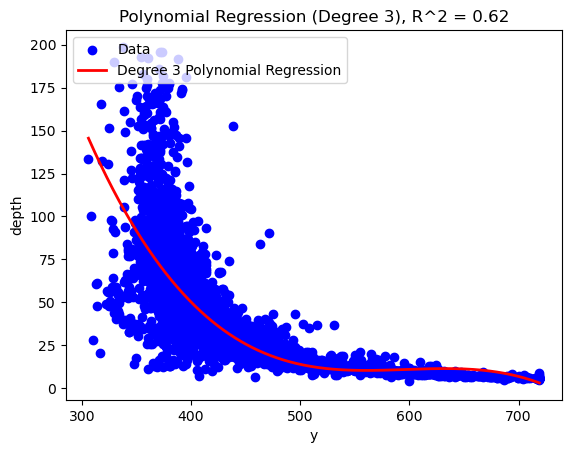

In [165]:
%matplotlib inline
degree = 3

poly = PolynomialFeatures(degree=degree, include_bias=False)
Y_poly = poly.fit_transform(df[["y"]])

# Fit the polynomial regression model
model = LinearRegression()
model.fit(Y_poly, df["depth"])

# Make predictions
d_pred = model.predict(Y_poly)
score_pred = model.score(Y_poly, df["depth"])

print(f"coef for degree = {degree}: {model.coef_}")
print(f"intercept for degree = {degree}: {model.intercept_}")
print(f"score for degree = {degree}: {score_pred}")

X_plot = np.arange(min(df["y"]), max(df["y"]), 0.01)[:, np.newaxis]
Y_poly_plot = poly.transform(X_plot)

# Predict using the fitted model
d_plot = model.predict(Y_poly_plot)

plt.scatter(df["y"], df["depth"], color='blue', label='Data')
plt.plot(X_plot, d_plot, color='red', linewidth=2, label='Degree 3 Polynomial Regression')
plt.title(f"Polynomial Regression (Degree {degree}), R^2 = {score_pred:.2f}")
plt.xlabel('y')
plt.ylabel('depth')
plt.legend(loc='upper left')
plt.show()



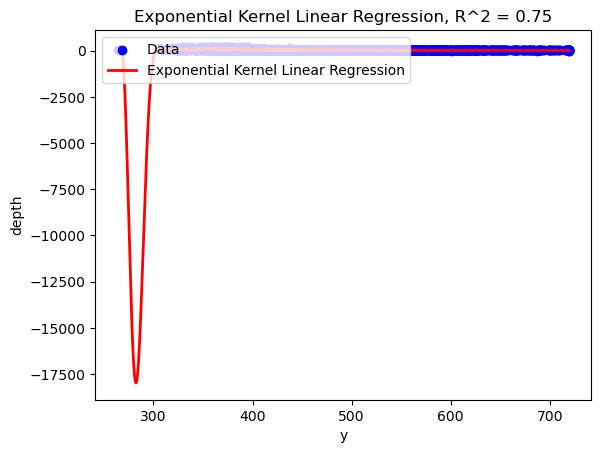

In [53]:
from sklearn.metrics import r2_score
from sklearn.metrics.pairwise import rbf_kernel

# Define the kernel parameter
gamma = 0.001  # You can adjust the value of gamma to control the shape of the exponential kernel

# Compute the RBF (exponential) kernel matrix
kernel_matrix = rbf_kernel(df[["y"]], gamma=gamma)



# Fit a linear regression model using the kernel matrix as features
model = LinearRegression()
model.fit(kernel_matrix, df["depth"])

# Make predictions
y_pred = model.predict(kernel_matrix)

# Calculate the R^2 score to evaluate the model's performance
r2 = r2_score(df["depth"], y_pred)

X_plot = np.arange(min(df["y"]), max(df["y"]), 0.1)[:, np.newaxis]

kernel_matrix_plot = rbf_kernel(X_plot, df[["y"]], gamma=gamma)
y_plot = model.predict(kernel_matrix_plot)

# Plot the results
plt.scatter(df["y"], df["depth"], color='blue', label='Data')
plt.plot(X_plot, y_plot, color='red', linewidth=2, label='Exponential Kernel Linear Regression')
plt.title(f"Exponential Kernel Linear Regression, R^2 = {r2:.2f}")
plt.xlabel('y')
plt.ylabel('depth')
plt.legend(loc='upper left')
plt.show()


/root/miniconda3/envs/ENV1/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


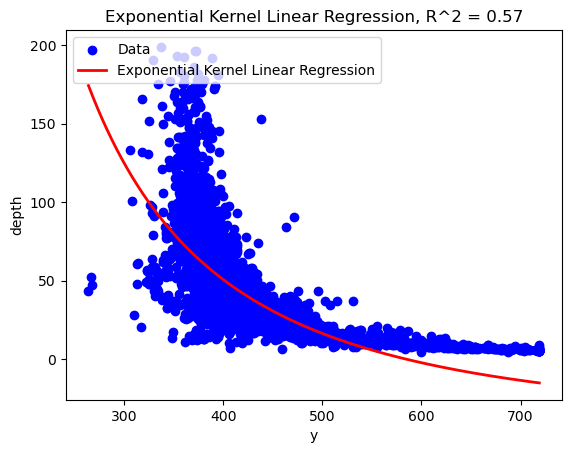

In [75]:
from sklearn.metrics import r2_score

def kernel_transfo(x, gamma=0.1):    
    return 1/x**2

# Define the kernel parameter
gamma = 0.1  # You can adjust the value of gamma to control the shape of the exponential kernel

# Compute the RBF (exponential) kernel matrix
y = kernel_transfo(df[["y"]], gamma=gamma)


# Fit a linear regression model using the kernel matrix as features
model = LinearRegression()
model.fit(y, df["depth"])

y_pred = model.predict(y)

# Calculate the R^2 score to evaluate the model's performance
r2 = r2_score(df["depth"], y_pred)

X_plot = np.arange(min(df["y"]), max(df["y"]), 0.1)[:, np.newaxis]
y_plot = model.predict(kernel_transfo(X_plot, gamma=gamma))

# Plot the results
plt.scatter(df["y"], df["depth"], color='blue', label='Data')
plt.plot(X_plot, y_plot, color='red', linewidth=2, label='Exponential Kernel Linear Regression')
plt.title(f"Exponential Kernel Linear Regression, R^2 = {r2:.2f}")
plt.xlabel('y')
plt.ylabel('depth')
plt.legend(loc='upper left')
plt.show()

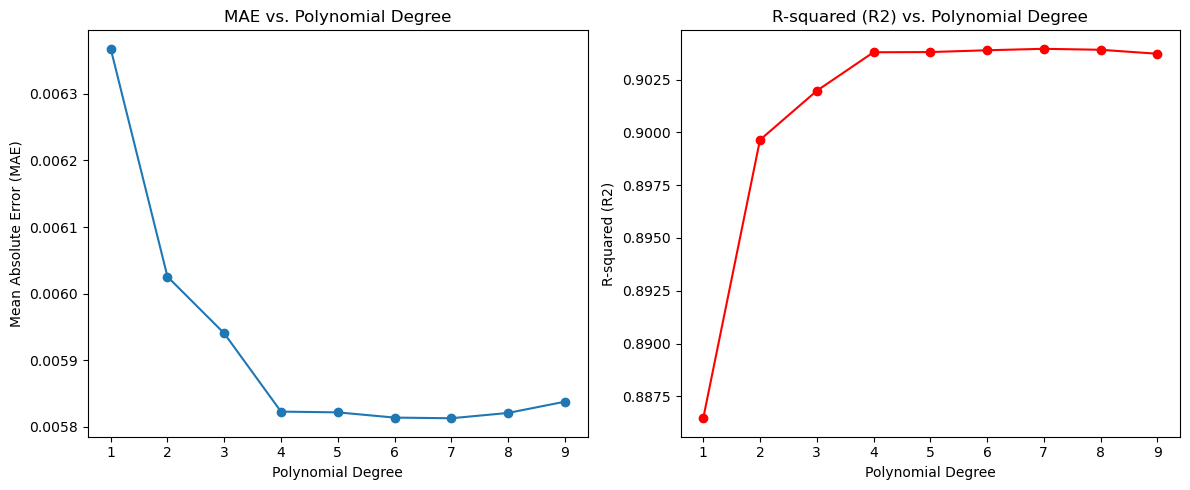

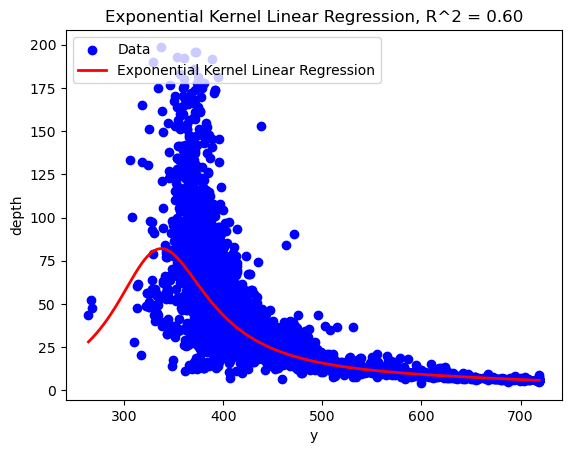

In [100]:
# Define a range of polynomial degrees
degrees = range(1, 10)  # Change the range as needed

# Initialize lists to store evaluation results
mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []

X = df[["y"]]
y = 1/df["depth"]

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Fit the polynomial regression model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Make predictions
    y_pred = model.predict(X_poly)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)

    # Append scores to lists
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Visualize the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(degrees, mae_scores, marker="o")
plt.title("MAE vs. Polynomial Degree")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Absolute Error (MAE)")

plt.subplot(1, 2, 2)
plt.plot(degrees, r2_scores, marker="o", color="red")
plt.title("R-squared (R2) vs. Polynomial Degree")
plt.xlabel("Polynomial Degree")
plt.ylabel("R-squared (R2)")

plt.tight_layout()
plt.show()


degree = 4
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)
r2 = r2_score(1/y, 1/y_pred)


X_plot = np.arange(min(df["y"]), max(df["y"]), 0.1)[:, np.newaxis]
y_plot = model.predict(poly.fit_transform(X_plot))

# Plot the results
plt.scatter(X, 1/y, color='blue', label='Data')
plt.plot(X_plot, 1/y_plot, color='red', linewidth=2, label='Exponential Kernel Linear Regression')
plt.title(f"Exponential Kernel Linear Regression, R^2 = {r2:.2f}")
plt.xlabel('y')
plt.ylabel('depth')
plt.legend(loc='upper left')
plt.show()



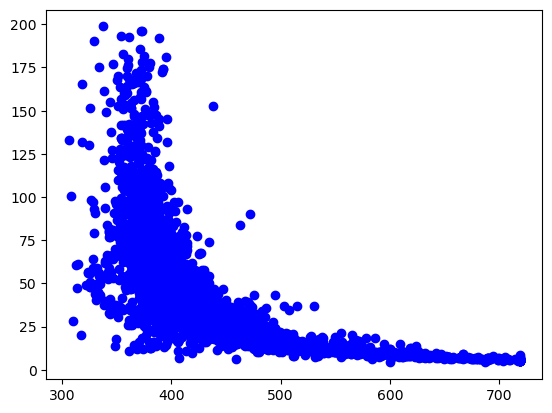

In [111]:
min_index = df[df["y"] == df["y"].min()].index
new_df = df = df.drop(min_index)
plt.scatter(df["y"], df["depth"], color='blue', label='Data')

plt.show()

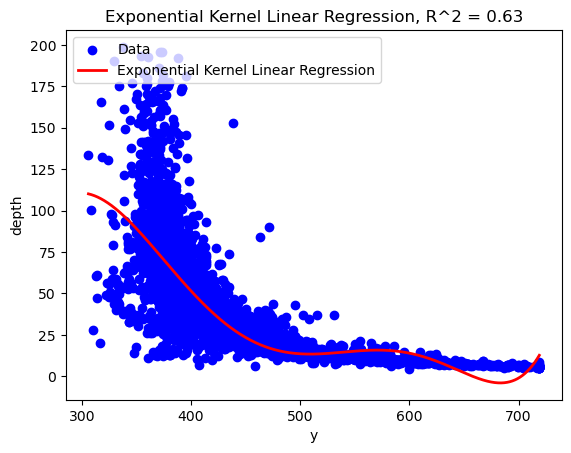

In [134]:
X = new_df["y"].values.reshape(-1, 1)
y = new_df["depth"].values.reshape(-1, 1)


degree = 6
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)
r2 = r2_score(y, y_pred)

X_plot = np.arange(X.min(), X.max(), 0.1)[:, np.newaxis]
y_plot = model.predict(poly.fit_transform(X_plot))

# Plot the results
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_plot, y_plot, color='red', linewidth=2, label='Exponential Kernel Linear Regression')
plt.title(f"Exponential Kernel Linear Regression, R^2 = {r2:.2f}")
plt.xlabel('y')
plt.ylabel('depth')
plt.legend(loc='upper left')
plt.show()





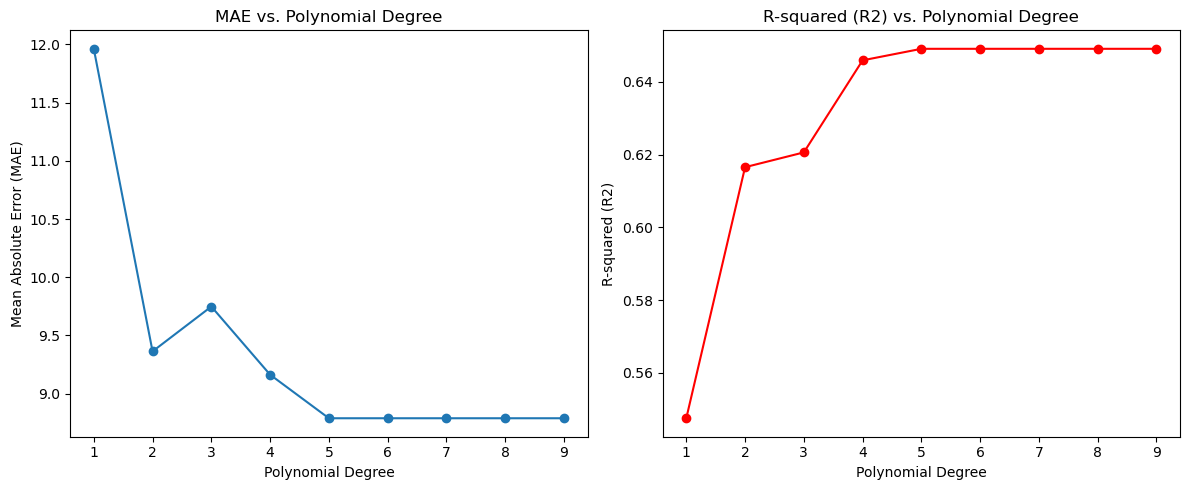

In [145]:
# Define a range of polynomial degrees
degrees = range(1, 10)  # Change the range as needed

# Initialize lists to store evaluation results
mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []

X = new_df["y"].values.reshape(-1, 1)
y = new_df["depth"].values.reshape(-1, 1)

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(1/X)

    # Fit the polynomial regression model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Make predictions
    y_pred = model.predict(X_poly)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)

    # Append scores to lists
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Visualize the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(degrees, mae_scores, marker="o")
plt.title("MAE vs. Polynomial Degree")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Absolute Error (MAE)")

plt.subplot(1, 2, 2)
plt.plot(degrees, r2_scores, marker="o", color="red")
plt.title("R-squared (R2) vs. Polynomial Degree")
plt.xlabel("Polynomial Degree")
plt.ylabel("R-squared (R2)")

plt.tight_layout()
plt.show()

Text(0, 0.5, 'depth')

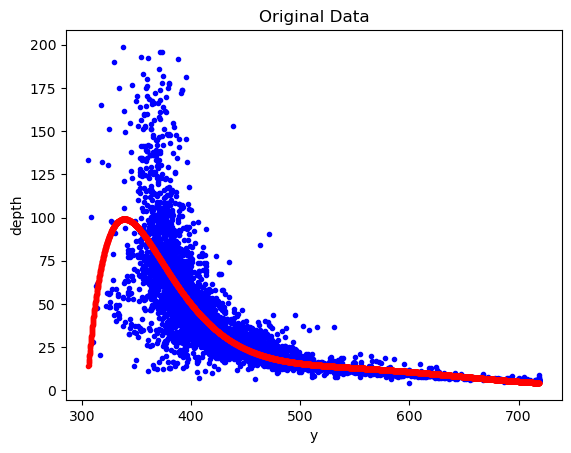

In [148]:
degree = 5
# Create polynomial features
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(1/X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Make predictions
y_pred = model.predict(X_poly)

X_plot = np.arange(X.min(), X.max(), 0.1)[:, np.newaxis]
y_plot = model.predict(poly.fit_transform(1/X_plot))

plt.scatter(X, y, color='blue', label='Data', marker=".")
plt.scatter(X_plot, y_plot, color='red', label='Data', marker=".")
plt.title('Original Data')
plt.xlabel('y')
plt.ylabel('depth')
plt.title('Original Data')
plt.xlabel('y')
plt.ylabel('depth')

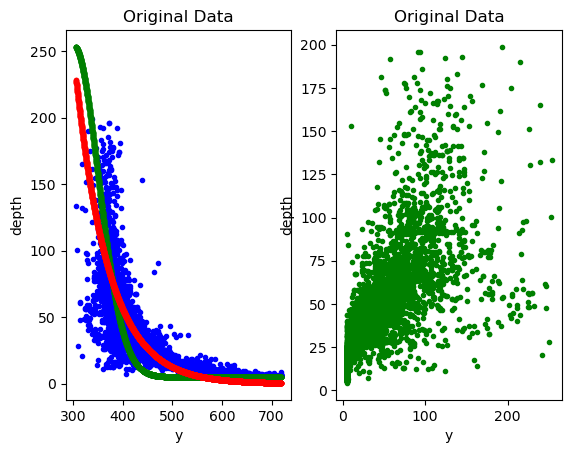

In [291]:
# Plot the results
X = new_df[["y"]]
y = new_df[["depth"]]


plt.subplot(1, 2, 1)
# Plot original data in the first subplot
plt.scatter(X, y, color='blue', label='Data', marker=".")
XX = np.arange(new_df["y"].min(), new_df["y"].max(), 0.1)
plt.scatter(XX, 5+250*np.exp(-2*10e-5*(XX-300)**2), color='green', label='Data', marker=".")
plt.scatter(XX, 250*np.exp(-1.5*10e-3*(XX-300)), color='red', label='Data', marker=".")
plt.title('Original Data')
plt.xlabel('y')
plt.ylabel('depth')

plt.subplot(1, 2, 2)
plt.scatter(5+250*np.exp(-2*10e-5*(X-300)**2), y, color='green', label='Data', marker=".")
plt.title('Original Data')
plt.xlabel('y')
plt.ylabel('depth')



plt.show()

0.555089645263511
[[0.54491055]]
[23.3005962]


Text(0, 0.5, 'depth')

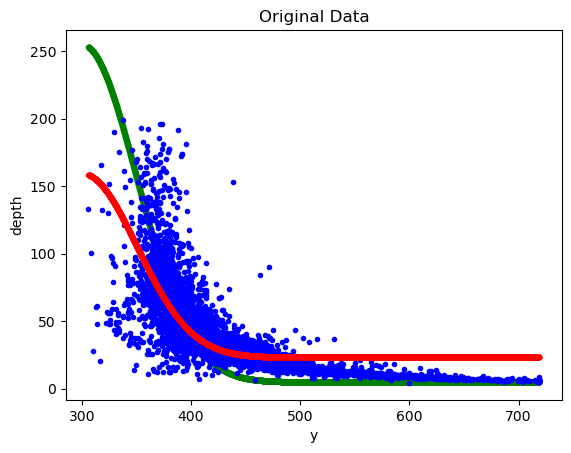

In [286]:
# Create polynomial features
X = np.array(new_df["y"]).reshape(-1, 1)
y = np.array(new_df["depth"]).reshape(-1, 1)

def fun_transfo(x, a=1.2*10e-3, b=300, c=500):    
    return c*np.exp(-a*(x-b))

plt.scatter(XX, 5+250*np.exp(-2*10e-5*(XX-300)**2), color='green', label='Data', marker=".")

def fun_transfo2(x, a=2*10e-5, b=300, c=250):    
    return c*np.exp(-a*(x-b)**2)
X_poly = fun_transfo2(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Make predictions
y_pred = model.predict(X_poly)

r2 = r2_score(y, y_pred)
print(r2)
print(model.coef_)
print(model.intercept_)

X_plot = np.arange(X.min(), X.max(), 0.1)[:, np.newaxis]
y_plot = model.predict(fun_transfo2(X_plot))

plt.scatter(X, y, color='blue', label='Data', marker=".")
plt.scatter(X_plot, y_plot, color='red', label='Data', marker=".")
plt.title('Original Data')
plt.xlabel('y')
plt.ylabel('depth')
plt.title('Original Data')
plt.xlabel('y')
plt.ylabel('depth')